In [13]:
df_xyz = pd.read_csv(jonas_folder + 'OscNext_Angle_m27_vG2_2jnn_test_predictions.csv')

In [33]:
from sklearn.preprocessing import normalize
unit_vects = normalize(np.array(df_xyz.loc[:, ["x_pred", "y_pred", "z_pred"]]))
azi, zen = azi_zen_from_units(unit_vects)#np.array(df_xyz.loc[:, ["x_pred", "y_pred", "z_pred"]]))

In [35]:
to_df = {"event_no": df_xyz['event_no'], "zenith_pred": zen, "azimuth_pred": azi}

In [38]:
pd.DataFrame(to_df).to_csv("Jonas_vG.csv")

np.isnan(zen).sum()

In [17]:
from test_script import azi_zen_from_units


../scripts/test_script.py:52: RuntimeWarning: invalid value encountered in arccos
  zen = np.arccos(arr[:, 2])


In [19]:
plt.hist(zen

array([1.22580872, 1.13864853, 1.01289038, ..., 0.86640039, 1.41523972,
       2.45478565])

In [11]:
pd.read_csv(jonas_folder + 'OscNext_Angle_m27_vG2_2jnn_test_predictions.csv')

,Unnamed: 0,event_no,azimuth,zenith,x_pred,y_pred,z_pred,x_sig,y_sig,z_sig
0,0,13188815.0,5.965024,0.951963,0.606427,0.522968,0.338185,0.321468,0.322432,0.268526
1,1,13188840.0,0.055570,0.956157,0.220909,0.125438,0.418822,0.483131,0.578005,0.410573
2,2,13188844.0,4.418117,1.123479,-0.019719,-0.432614,0.529411,0.453965,0.450229,0.385913
3,3,13188911.0,0.258589,1.010691,0.316597,0.031542,0.172616,0.547725,0.550748,0.469585
4,4,13189105.0,6.016189,1.037441,0.057161,-0.160536,0.376016,0.515181,0.517674,0.440870
...,...,...,...,...,...,...,...,...,...,...
1658357,1658357,13168513.0,2.856650,1.902059,-0.048680,0.005054,-0.702663,0.471431,0.458943,0.288629
1658358,1658358,13171849.0,1.337218,2.474213,-0.398156,-0.061379,-0.685586,0.333302,0.415589,0.153104
1658359,1658359,13172518.0,4.028215,0.499375,-0.670090,0.045986,0.647574,0.228884,0.336798,0.159857
1658360,1658360,13172584.0,3.286212,1.521588,-0.411741,0.102773,0.154930,0.446668,0.563313,0.522453


In [39]:
import pandas as pd 
import os, sys, sqlite3
import os.path as osp   
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../scripts")
from test_script import azi_zen_from_units

# test_folder = osp.join("..", "test_folder")


# Ids and truth

db_path  = "/groups/hep/pcs557/databases/dev_lvl7_mu_nu_e_classification_v003/data/dev_lvl7_mu_nu_e_classification_v003_unscaled.db"
set_path = "/groups/hep/pcs557/databases/dev_lvl7_mu_nu_e_classification_v003/meta/sets.pkl"

test_id  = pd.read_pickle(set_path)['test']
with sqlite3.connect(db_path) as conn:
    df = pd.read_sql(f"select * from truth where event_no in {tuple(test_id.event_no.to_list())}", conn).sort_values("event_no").set_index("event_no", drop = True)

csv_list = [
            'OscNext_Angle_m27_23ge_test_predictions.csv','OscNext_Angle_m27_bothvMF2_vcqh_test_predictions.csv',
            'OscNext_Angle_m27_2xPvM_sylf_test_predictions.csv',
            'OscNext_Angle_m27_MEa_fcgf_test_predictions.csv',
            'OscNext_Angle_m27_vG2_2jnn_test_predictions.csv'
]

jonas_folder = "/groups/hep/jonasv/predictions/"

##### PATHS ##### 
model1 = {"path":  jonas_folder + 'OscNext_Angle_m27_23ge_test_predictions.csv',
          "color": "#712f79", 
          "name":  "SvM"}

model2 = {"path":   jonas_folder + 'OscNext_Angle_m27_bothvMF2_vcqh_test_predictions.csv',
          "color": "#20a4f3", 
          "name":  "SvM/2xPvM"}

model3 ={"path":    jonas_folder + 'OscNext_Angle_m27_2xPvM_sylf_test_predictions.csv',
          "color": "#519872", 
          "name":  "2xPvM"}

model4   ={"path":  jonas_folder + 'OscNext_Angle_m27_MEa_fcgf_test_predictions.csv',
           "color": "#f7996e",
           "name":  "MSE+MAE  "}

model5   ={"path":  "Jonas_vG.csv",
           "color": "k",
           "name":  "vG"}



############################
#
# schauser path: /jakobsch/predictions/jakob_predictions_0106_2.csv eller /jakobsch/predictions/jakob_predictions_0806_new.csv
# chriller path: /chri862z/work/IceCube/predictions/ckj_2dvM_0906.csv
#

Comparison = [model1, model2, model3, model4, model5]

In [67]:
[model['color'] for model in Comparison]

['#712f79', '#20a4f3', '#519872', '#f7996e', 'k']

In [40]:
model1

{'path': '/groups/hep/jonasv/predictions/OscNext_Angle_m27_23ge_test_predictions.csv',
 'color': '#712f79',
 'name': 'SvM'}

In [41]:
def angle_diffs(A, B):
    return np.arccos(np.cos(A) * np.cos(B) + np.sin(A) * np.sin(B)) * 180 / np.pi


def cal_acc(azp, zep, azt, zet):

            s1 = np.sin( zet + azt - azp )
            s2 = np.sin( zet - azt + azp )
            c1 = np.cos( zet - zep )
            c2 = np.cos( zet + zep )
            cos_angle = 0.5*abs(np.sin(zep))*( s1 + s2 ) + 0.5*(c1 + c2)

            return np.arccos(cos_angle) * 180 / np.pi

def solid_angle(azp, zep, azt, zet):
    return np.arccos(np.sin(zet) * np.sin(zep) + np.cos(zet)*np.cos(zep)*np.cos(azt - azp)) * 180 / np.pi


for model in Comparison:
    model['df']          = pd.read_csv(model['path']).sort_values("event_no")
    model['df'].event_no = model['df'].event_no.apply(lambda x: int(x + 0.5))
    model['df']          = model['df'].set_index("event_no", drop = True)
    model['zen_diff']    = angle_diffs(model['df'].zenith_pred, df.zenith) 
    # model['energy_res']  = model['df']['energy_log10_pred'] - df.energy_log10
    if "azimuth_pred" in model['df'].columns:
        model['azi_diff']    = angle_diffs(model['df'].azimuth_pred, df.azimuth)
        model['solid_angle'] = cal_acc(model['df']["azimuth_pred"], model['df']["zenith_pred"], df.azimuth, df.zenith)

In [ ]:
# schauser['df'][1:].to_csv("schauser_corrected.csv")

In [42]:
for model in Comparison:
    # iqr = np.percentile(model['energy_res'], [25, 50, 75])
    # bias = iqr[1]
    # width = (iqr[2] - iqr[0]) / 1.349
    if "azi_diff" in model.keys():
        sol = np.median(model['solid_angle'])
        azi = np.median(model['azi_diff'])
    else:
        sol = 0.
        azi = 0.
    zen = np.median(model['zen_diff'])

    print(f"{model['name']}:\t solid: {sol:.1f} \t azimuth: {azi:.1f} \t zenith {zen:.1f}")

SvM:	 solid: 33.7 	 azimuth: 30.9 	 zenith 16.2
SvM/2xPvM:	 solid: 35.0 	 azimuth: 32.4 	 zenith 13.9
2xPvM:	 solid: 34.4 	 azimuth: 31.0 	 zenith 12.9
MSE+MAE  :	 solid: 43.8 	 azimuth: 44.9 	 zenith 13.7
vG:	 solid: 33.5 	 azimuth: 30.4 	 zenith 16.1


In [43]:

def chosen_percentiles(diffs):
    diffs = diffs[~np.isnan(diffs)]
    u, median, low_one_sig = np.percentile(diffs, [16, 50, 68])
    return u, median, low_one_sig 

def performance(diffs, Ns):
    cuts = np.linspace(0, 4, 9)
    mask = np.searchsorted(cuts, Ns)

    us, meds, lows, ns = [], [], [], []

    for i in np.unique(mask):
        u, median, low = chosen_percentiles(diffs[mask == i]) 
        us.append(u)
        meds.append(median)
        lows.append(low)
        ns.append(np.mean(Ns[mask == i]))
    
    return_dict = {
        "us": np.array(us),
        "meds": np.array(meds),
        "lows": np.array(lows),
        "xs":  np.array(ns)
    }
    return return_dict
    
def chosen_percentiles_energy(diffs):
    diffs = diffs[~np.isnan(diffs)]
    iqr = np.percentile(diffs, [25, 50, 75])
    width = (iqr[2] - iqr[0]) / 1.349
    low, high = np.percentile(diffs, [16, 84])
    return width, (low, high)



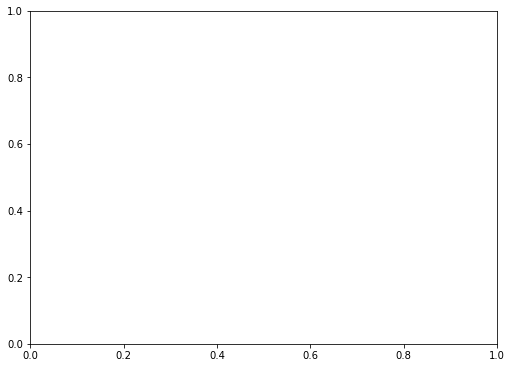

In [63]:
from matplotlib.gridspec import GridSpec
fig, ax     = plt.subplots(figsize = (7, 5), constrained_layout = True)

# ax_zen  = fig.add_subplot(gs[:3, :3])
# ax_ene  = fig.add_subplot(gs[:3, 3:])
# ax_sol  = fig.add_subplot(gs[3:, :2])
# ax_azi  = fig.add_subplot(gs[3:, 2:4])
# ax_bl   = fig.add_subplot(gs[3:, 4:])

In [64]:
bins = np.linspace(-0.5, 4.5, 11)

offsets = np.linspace(-0.08, 0.08, len(Comparison))


for model, off in zip(Comparison, offsets): 
    if "azi_diff" in model.keys():
        try:
            dict = performance(abs(model['solid_angle']), df["energy_log10"])
        except:
            dict = performance(abs(model['solid_angle'][1:], df["energy_log10"]))
    # dict = performance(model['solid_angle'], df["energy_log10"])
    x, y = dict["xs"], dict["meds"]
    h, l = dict["us"], dict["lows"]
    ax.scatter(x + off, y, color = model['color'], marker = "x", ls = "None", s= 10)
    ax.errorbar(x + off, y, yerr = np.vstack([y - l, h - y]), color = model['color'], marker = None, s = None, label = model['name'], ls = "None", elinewidth = 1)



ax.set_ylabel("$\Delta \Omega$ [deg]", fontsize = 12)
ax.set_xlabel("$log_{10}(E)$", fontsize = 12)

ax.set_title("Comparison of Angular Loss Functions", fontsize = 16)

ax.legend(loc = "upper left")

ax2 = ax.twinx()


ax2.hist(df['energy_log10'], bins = bins, zorder = 5, alpha = 0.25, color = "gray");
ax2.set_yscale("log")
# ax2.set_yticks([])
# ax2.set_yticklabels([])

# ax2.set_ylabel("Freq")


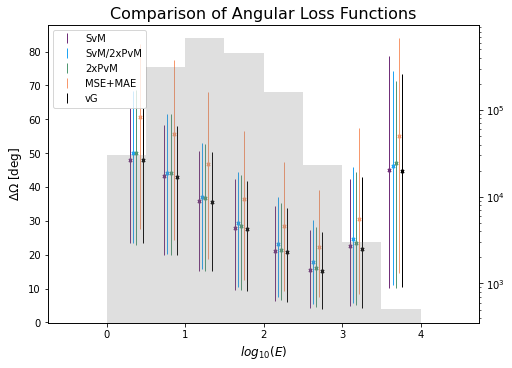

In [65]:
fig


In [66]:
fig.savefig("../figures/comparison_of_loss.pdf")

In [19]:
ax = ax_ene
ax_bias = ax_bl

for model, off in zip(Comparison, offsets): 
    try:
        dict = energy_width_and_bias(model['energy_res'], df["energy_log10"])
    except:
        dict = energy_width_and_bias(model['energy_res'][1:], df["energy_log10"])

    x, w = dict["xs"], dict["ws"]
    l, h = dict["lows"], dict["highs"] 
    # h, l = dict["us"], dict["lows"]
    ax.plot(x, w, color = model['color'], marker = "o", ls = "--")
    ax_bias.plot(x, l, color = model['color'], marker = "None", ls = "--")
    ax_bias.plot(x, h, color = model['color'], marker = "None", ls = "--")
    # ax.errorbar(x, y, yerr = np.vstack([y - l, h - y]), color = model['color'], marker = None, s = None, label = model['name'], ls = "None")



# ax.set_ylabel("$\Delta \Omega$ [deg]")
ax_bias.set_ylabel("$w{\Delta E}$")
ax.set_xlabel("$log_{10}(E)$")

ax.set_title("Energy Performance OscNext")
ax.set_ylabel("median$(|\log_{10}(E_{reco}/E_{true})|)$")

ax_bias.set_title("Energy Bias (16th and 84th percentile)")
ax_bias.set_ylabel("$\log_{10}(E_{reco}/E_{true})$")
ax_bias.set_xlabel("$log_{10}(E)$")


ax2 = ax.twinx()
ax2.set_yscale("log")

ax2.hist(df['energy_log10'], bins = bins, zorder = 5, alpha = 0.25, color = "gray");
ax2.set_ylabel("Freq of Test Data")


ax2 = ax_bl.twinx()
ax2.set_yscale("log")

ax2.hist(df['energy_log10'], bins = bins, zorder = 5, alpha = 0.25, color = "gray");
ax2.set_ylabel("Freq of Test Data")


Text(0, 0.5, 'Freq of Test Data')

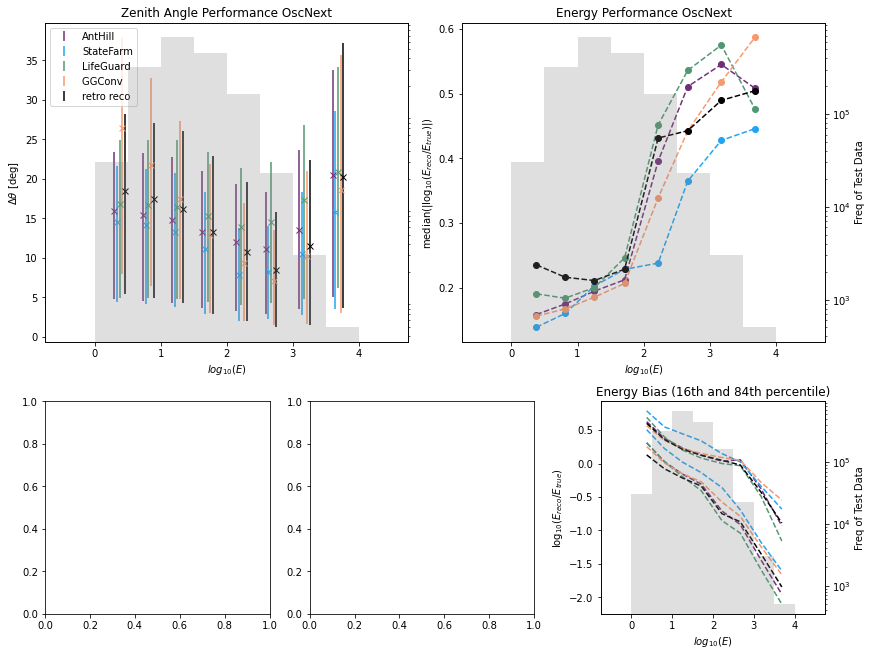

In [20]:
fig

In [21]:
ax = ax_azi
offsets *= 1.1

for model, off in zip(Comparison, offsets): 
    if "azi_diff" in model.keys():
        try:
            dict = performance(abs(model['azi_diff']), df["energy_log10"])
        except:
            dict = performance(abs(model['azi_diff'][1:], df["energy_log10"]))
    x, y = dict["xs"], dict["meds"]
    h, l = dict["us"], dict["lows"]
    ax.scatter(x + off, y, color = model['color'], s = 10,  marker = "x", ls = "None")
    ax.errorbar(x + off, y, yerr = np.vstack([y - l, h - y]), color = model['color'], marker = None, s = None, label = model['name'], ls = "None", elinewidth = 1)



ax.set_ylabel("$\Delta \phi$ [deg]")
ax.set_xlabel("$log_{10}(E)$")

ax.set_title("Azimuth")

ax2 = ax.twinx()
ax2.set_yscale("log")

ax2.hist(df['energy_log10'], bins = bins, zorder = 5, alpha = 0.2, color = "gray");
# ax2.set_ylabel("Freq")
ax2.set_yticklabels([])

[Text(1, 10.0, ''),
 Text(1, 100.0, ''),
 Text(1, 1000.0, ''),
 Text(1, 10000.0, ''),
 Text(1, 100000.0, ''),
 Text(1, 1000000.0, ''),
 Text(1, 10000000.0, '')]

In [22]:
ax = ax_sol

ax2 = ax.twinx()
ax2.set_yscale("log")

ax2.hist(df['energy_log10'], bins = bins, zorder = 5, alpha = 0.2, color = "gray");
# ax2.set_ylabel("Freq")

ax2.set_yticklabels([])


[Text(1, 10.0, ''),
 Text(1, 100.0, ''),
 Text(1, 1000.0, ''),
 Text(1, 10000.0, ''),
 Text(1, 100000.0, ''),
 Text(1, 1000000.0, ''),
 Text(1, 10000000.0, '')]

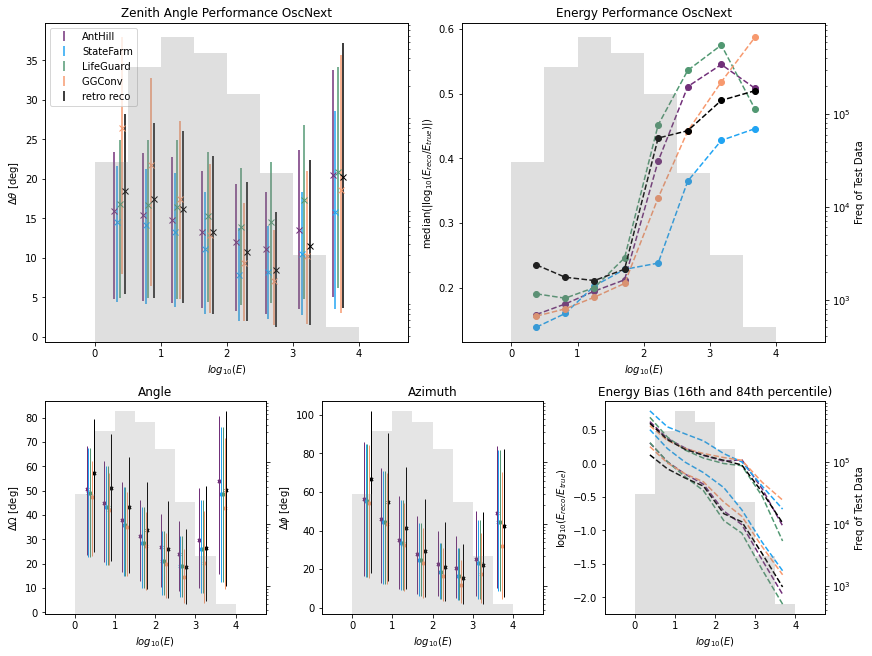

In [23]:
fig

In [24]:
fig.savefig("../figures/NeutrinoPerformance.pdf")